In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
Credit_card_data = pd.read_csv('BankChurners.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'BankChurners.csv'

In [4]:
Credit_card_data.head()

NameError: name 'Credit_card_data' is not defined

In [4]:
# checking count the number of unique values in each column of the data
Credit_card_data.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

In [5]:
# checking for duplicated values
Credit_card_data.duplicated().sum()

0

In [6]:
# Dropping columns with unusual names
Credit_card_data.drop([ 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'], axis=1, inplace=True)

In [7]:
Credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
Credit_card_data.shape

(10127, 20)

In [9]:
# Define dictionaries for mapping
mapping_dicts = {
    'Attrition_Flag': {'Existing Customer': 0, 'Attrited Customer': 1},
    'Education_Level': {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Post-Graduate': 4, 'Graduate': 5, 'Doctorate': 6},
    'Income_Category': {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5},
    'Card_Category': {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}
}

# Apply the mappings using a loop
for col, mapping_dict in mapping_dicts.items():
    Credit_card_data[col] = Credit_card_data[col].map(mapping_dict)

In [10]:
# Working with Nominal Features with pandas `get_dummies` function.
Credit_card_data = pd.get_dummies(Credit_card_data, columns=['Gender', 'Marital_Status'])

encoded = list(Credit_card_data.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

24 total features after one-hot encoding.


In [11]:
Credit_card_data.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,45,3,2,3,0,39,5,1,3,...,1144,42,1.625,0.061,0,1,0,1,0,0
1,0,49,5,5,1,0,44,6,1,2,...,1291,33,3.714,0.105,1,0,0,0,1,0
2,0,51,3,5,4,0,36,4,1,0,...,1887,20,2.333,0.000,0,1,0,1,0,0
3,0,40,4,2,1,0,34,3,4,1,...,1171,20,2.333,0.760,1,0,0,0,0,1
4,0,40,3,1,3,0,21,5,1,0,...,816,28,2.500,0.000,0,1,0,1,0,0


In [12]:
Credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Income_Category           10127 non-null  int64  
 5   Card_Category             10127 non-null  int64  
 6   Months_on_book            10127 non-null  int64  
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
 12  Avg_Open_To_Buy           10127 non-null  float64
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 14  Total_

In [13]:
Credit_card_data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

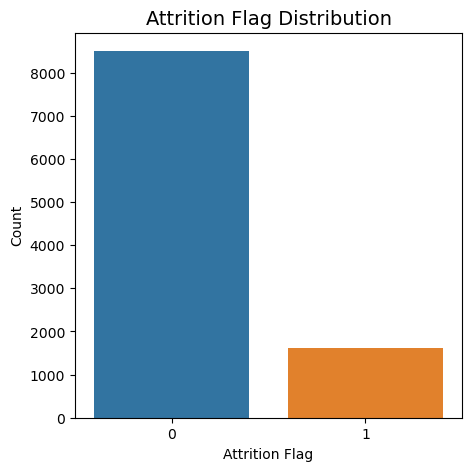

In [14]:
# Create a bar plot for attrition flag
attrition_counts=Credit_card_data['Attrition_Flag'].value_counts()
plt.figure(figsize=(5, 5))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values)
plt.title('Attrition Flag Distribution', fontsize=14)
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

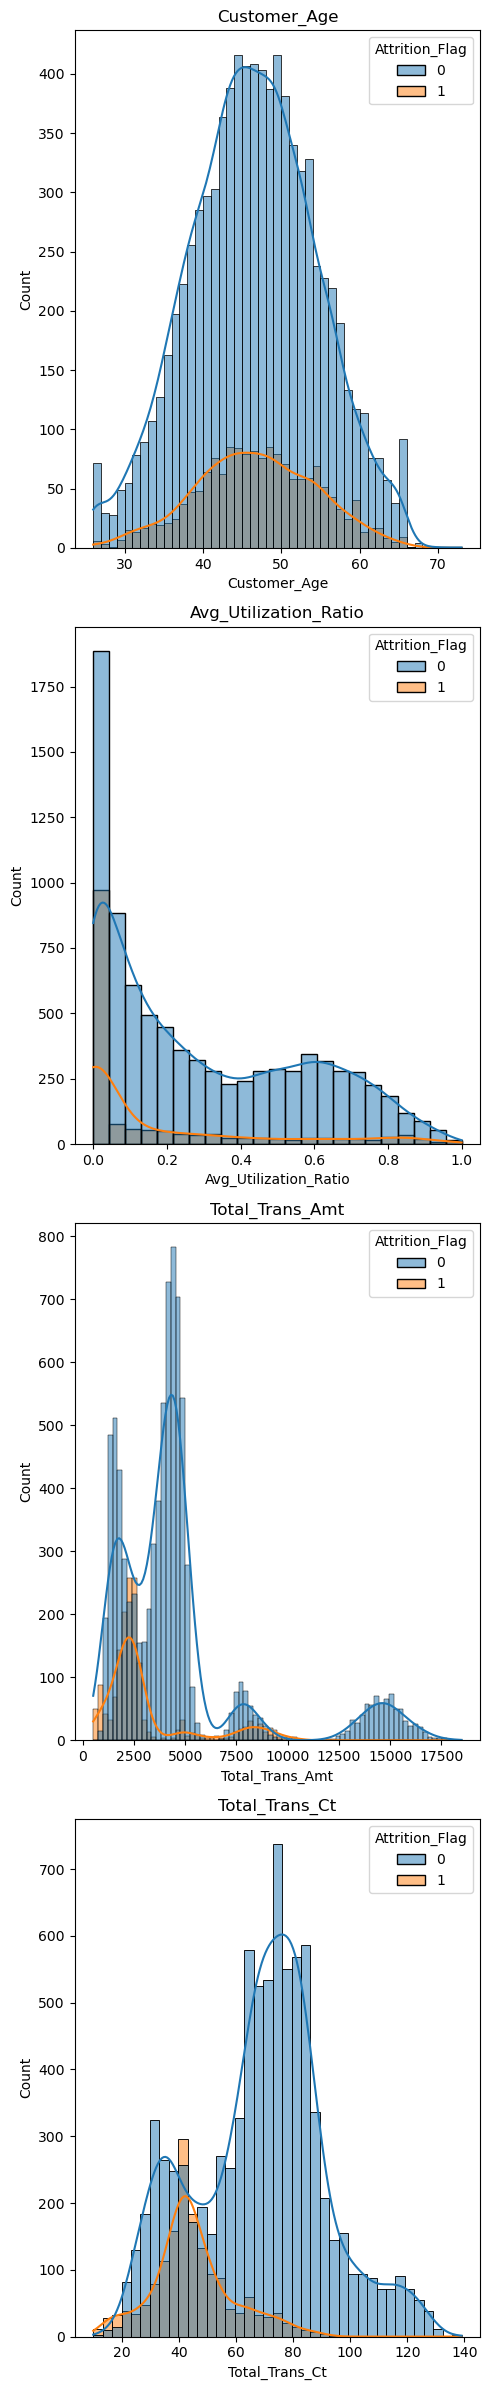

In [15]:
#creating plots for numerical data
columns_to_plot = ['Customer_Age', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Total_Trans_Ct',]
fig, axs = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(5, 6 * len(columns_to_plot)))

# Iterate through the columns of the dataset and create plots
for i, column in enumerate(columns_to_plot):
    # Plot for the current column
    sns.histplot(data=Credit_card_data, x=column, hue='Attrition_Flag', kde=True, ax=axs[i])
    axs[i].set_title(column)

# Adjust layout if necessary
plt.tight_layout()

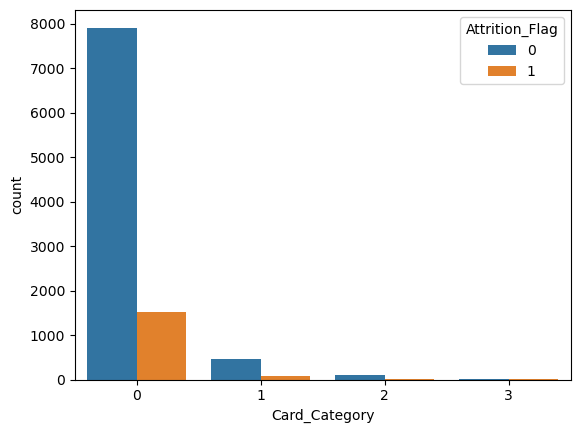

In [16]:
sns.countplot(x='Card_Category',data = Credit_card_data, hue='Attrition_Flag')
plt.show()

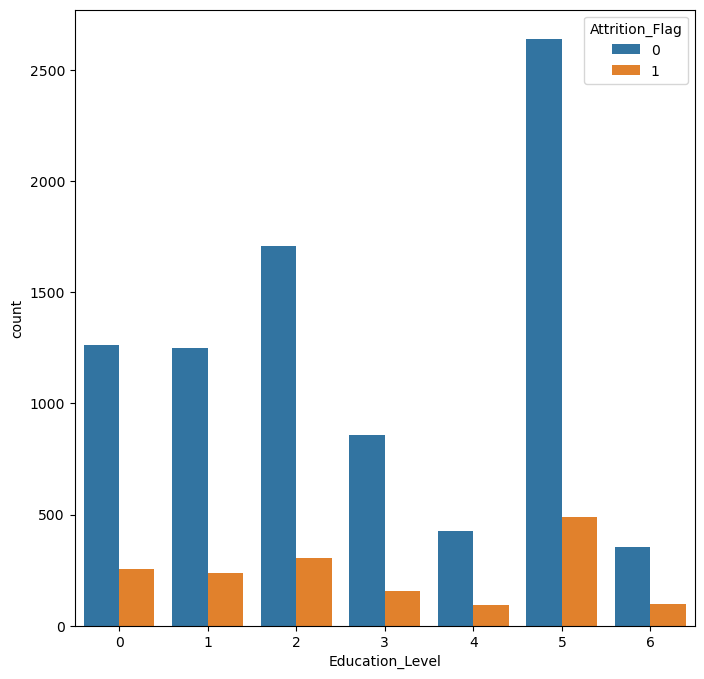

In [17]:
plt.figure(figsize=[8,8])
sns.countplot(x='Education_Level',data = Credit_card_data, hue='Attrition_Flag')
plt.show()

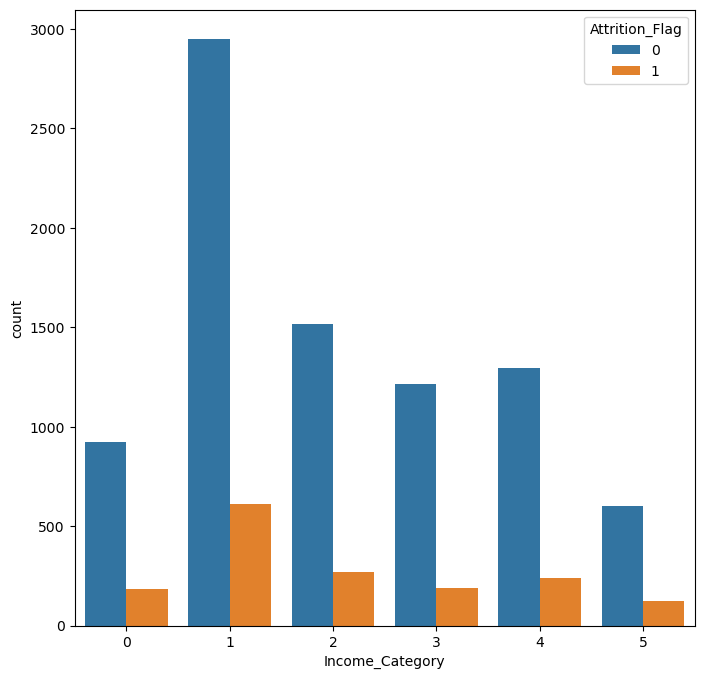

In [18]:
plt.figure(figsize=[8,8])
sns.countplot(x='Income_Category',data = Credit_card_data, hue='Attrition_Flag')
plt.show()

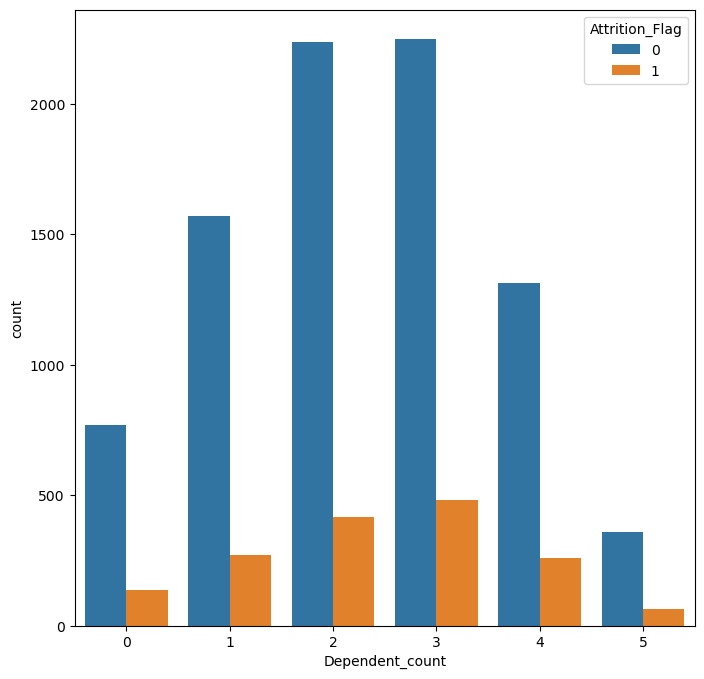

In [19]:
plt.figure(figsize=[8,8])
sns.countplot(x='Dependent_count',data = Credit_card_data, hue='Attrition_Flag')
plt.show()

In [20]:
# First we extract the x Featues and y Label
X = Credit_card_data.drop(['Attrition_Flag'], axis=1)
y = Credit_card_data['Attrition_Flag']

In [32]:
# Then we Split the data into training and testing sets (80% training, 20% testing)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Decision tree Regression 
dec_tree = DecisionTreeClassifier(max_depth=4)
dec_tree.fit(X_train, y_train)

predictions = dec_tree.predict(X_test)
percentage = dec_tree.score(X_test,y_test)

res=confusion_matrix(y_test,predictions)
print("confusion matrix")
print(res)
y_pred =dec_tree.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy={percentage*100}%")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')


confusion matrix
[[1667   32]
 [ 120  207]]
Accuracy=92.49753208292202%
Precision: 0.87
Recall: 0.63
F1 Score: 0.73


                     Feature  Importance
14            Total_Trans_Ct    0.448985
10       Total_Revolving_Bal    0.283001
6   Total_Relationship_Count    0.132520
13           Total_Trans_Amt    0.103926
15       Total_Ct_Chng_Q4_Q1    0.016125
0               Customer_Age    0.015443
21     Marital_Status_Single    0.000000
20    Marital_Status_Married    0.000000
19   Marital_Status_Divorced    0.000000
18                  Gender_M    0.000000
17                  Gender_F    0.000000
16     Avg_Utilization_Ratio    0.000000
11           Avg_Open_To_Buy    0.000000
12      Total_Amt_Chng_Q4_Q1    0.000000
1            Dependent_count    0.000000
9               Credit_Limit    0.000000
8      Contacts_Count_12_mon    0.000000
7     Months_Inactive_12_mon    0.000000
5             Months_on_book    0.000000
4              Card_Category    0.000000
3            Income_Category    0.000000
2            Education_Level    0.000000
22    Marital_Status_Unknown    0.000000


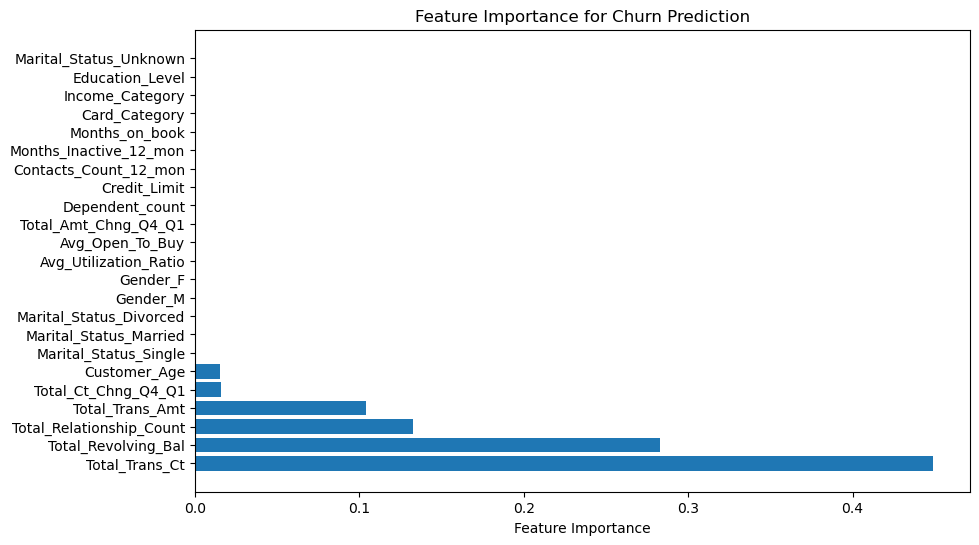

In [22]:
# Extract feature importances
feature_importance = dec_tree.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Churn Prediction')
plt.show()

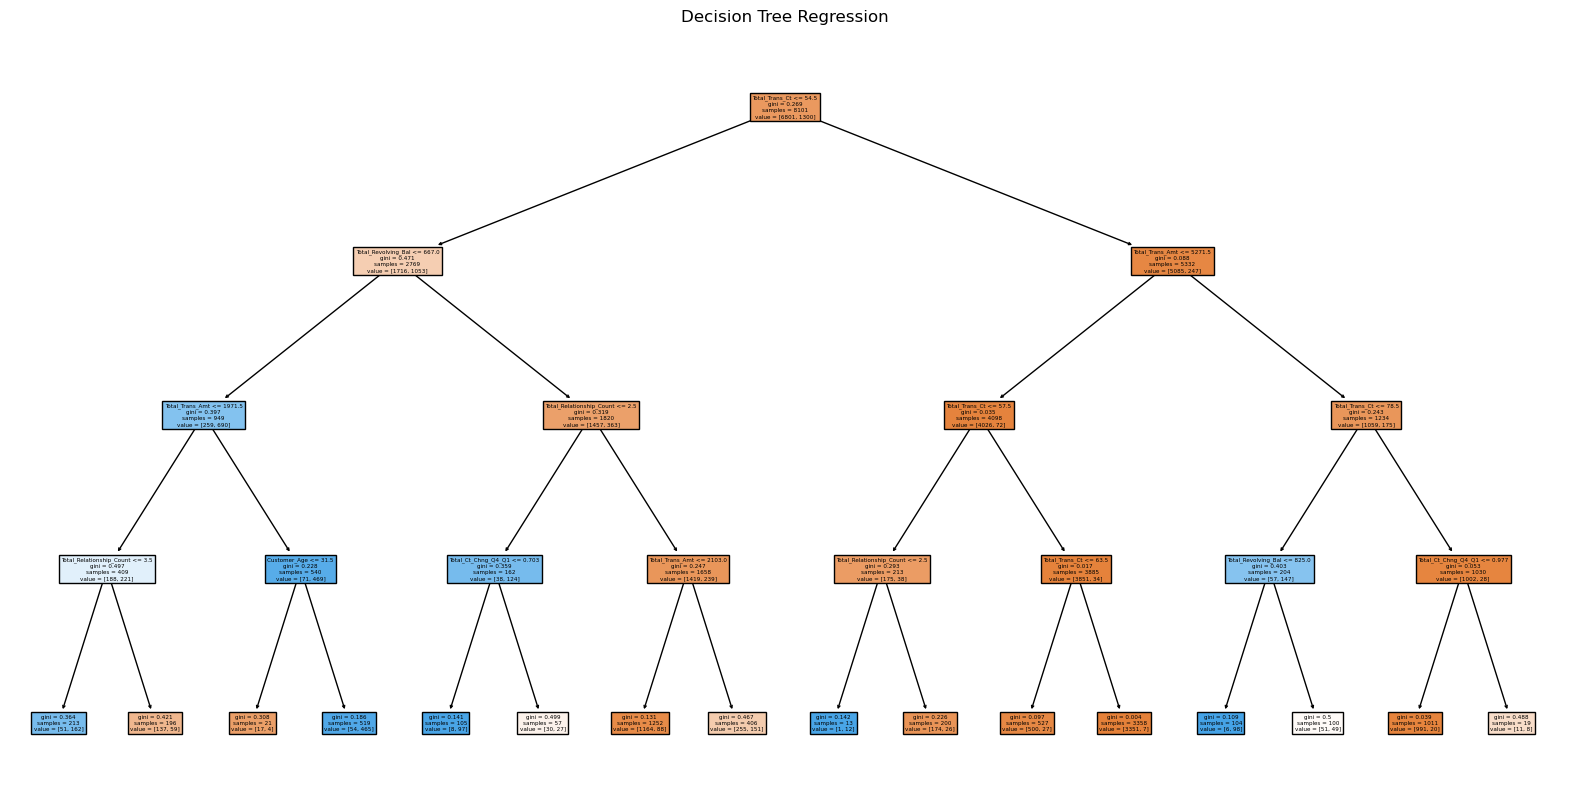

In [23]:
from sklearn.tree import plot_tree

feature_names_list = feature_names.tolist()
plt.figure(figsize=(20, 10))
plot_tree(dec_tree, filled=True, feature_names=feature_names_list)
plt.title("Decision Tree Regression")
plt.show()

In [24]:
from sklearn.tree import export_text

text_representation = export_text(dec_tree)

print(text_representation)

|--- feature_14 <= 54.50
|   |--- feature_10 <= 667.00
|   |   |--- feature_13 <= 1971.50
|   |   |   |--- feature_6 <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  3.50
|   |   |   |   |--- class: 0
|   |   |--- feature_13 >  1971.50
|   |   |   |--- feature_0 <= 31.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  31.50
|   |   |   |   |--- class: 1
|   |--- feature_10 >  667.00
|   |   |--- feature_6 <= 2.50
|   |   |   |--- feature_15 <= 0.70
|   |   |   |   |--- class: 1
|   |   |   |--- feature_15 >  0.70
|   |   |   |   |--- class: 0
|   |   |--- feature_6 >  2.50
|   |   |   |--- feature_13 <= 2103.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_13 >  2103.00
|   |   |   |   |--- class: 0
|--- feature_14 >  54.50
|   |--- feature_13 <= 5271.50
|   |   |--- feature_14 <= 57.50
|   |   |   |--- feature_6 <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  2.50
|   |   |   |   |--- class: 0
|   |   |--- feature_14 >  57.50

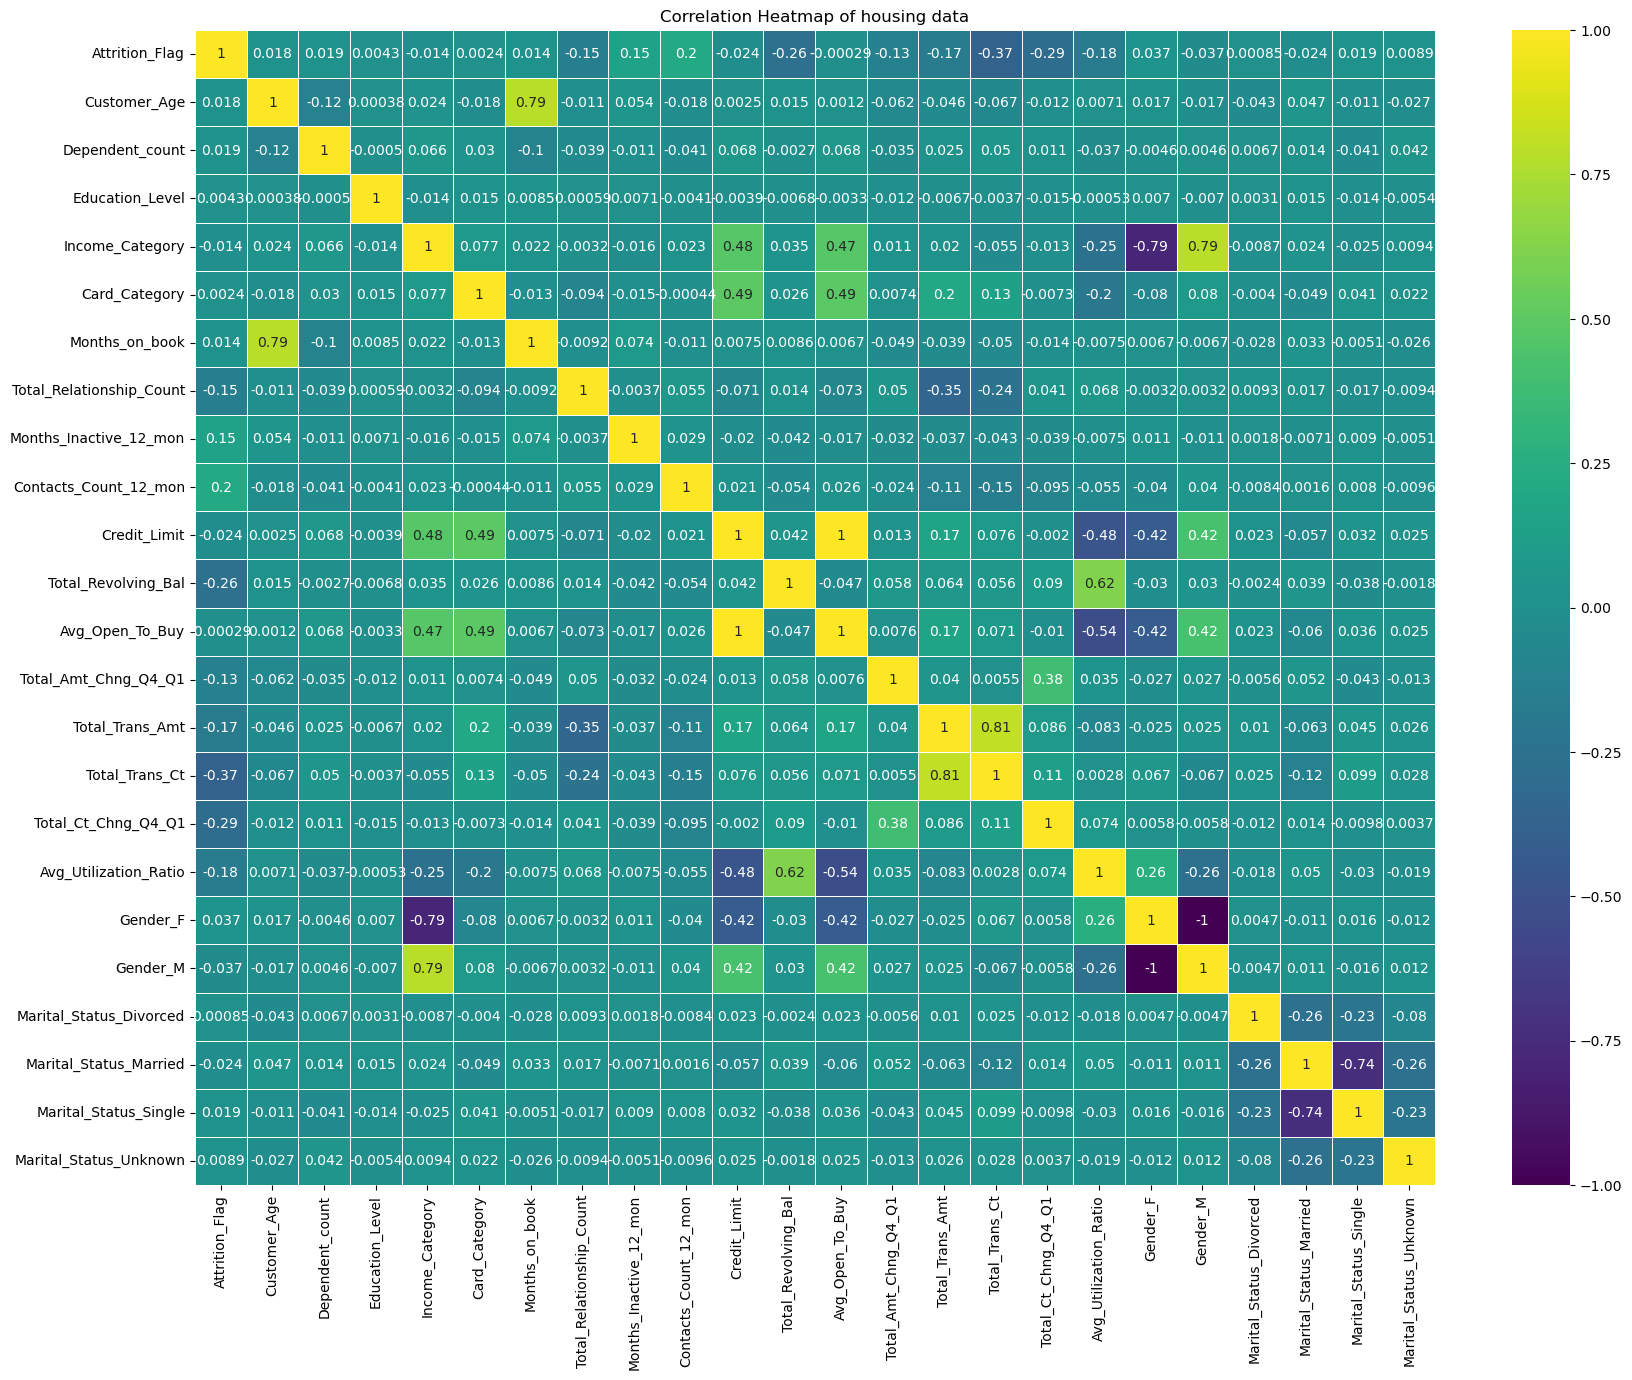

In [25]:
correlation=Credit_card_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap of housing data')
plt.show()

Text(0, 0.5, 'Avg_Open_To_Buy')

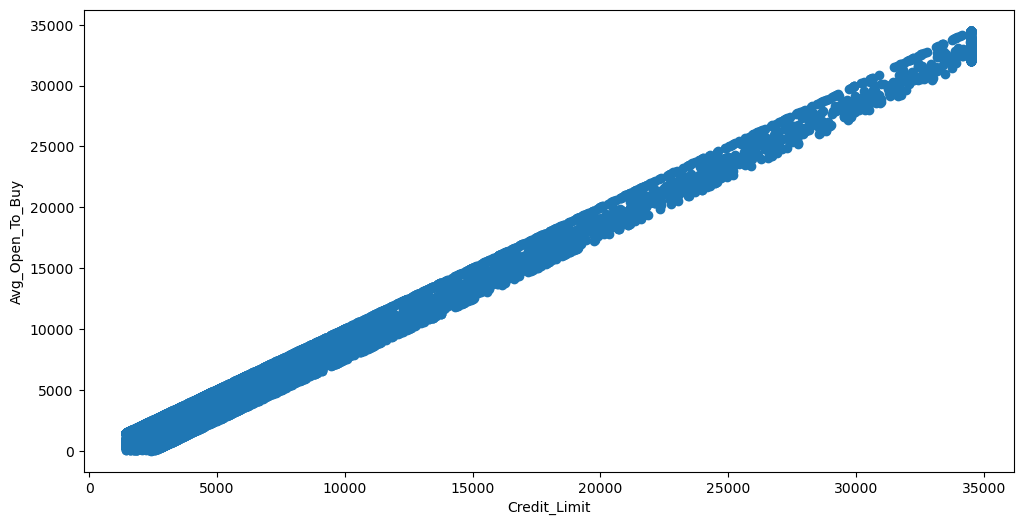

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(Credit_card_data['Credit_Limit'],Credit_card_data['Avg_Open_To_Buy'])
plt.xlabel('Credit_Limit')
plt.ylabel('Avg_Open_To_Buy')